In [21]:
import pandas as pd
import numpy as np
import random
from sklearn.ensemble  import GradientBoostingClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

### **Preparo dos Datasets**

In [50]:
df_treino = pd.read_csv('Treino.csv')
X = df_treino.iloc[:, 0:9].values
y = df_treino.iloc[:, 9].values

df_teste = pd.read_csv('Teste.csv')
X_teste = df_teste.iloc[:, 0:9].values
y_teste = df_teste.iloc[:, 9].values


df_validacao = pd.read_csv('Validacao.csv')
X_validacao = df_validacao.iloc[:, 0:9].values
y_validacao = df_validacao.iloc[:, 9].values

In [51]:
df_treino.describe()

,J1,J2,J3,J4,J5,J6,J7,J8,J9,Resultado
count,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000
mean,0.013445,0.024370,0.031092,0.007563,0.006723,0.035294,0.028571,0.031933,0.062185,0.537815
std,0.818101,0.813207,0.831391,0.809392,0.848462,0.814357,0.829963,0.819642,0.820981,1.151223
min,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
25%,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000


In [52]:
df_treino['Resultado'].value_counts()

Resultado
 1    320
-1    320
 2    320
 0    230
Name: count, dtype: int64

In [53]:
df_validacao.describe()

,J1,J2,J3,J4,J5,J6,J7,J8,J9,Resultado
count,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000
mean,-0.026846,-0.060403,0.167785,0.040268,0.134228,0.067114,-0.046980,-0.060403,-0.020134,0.536913
std,0.829737,0.807299,0.808759,0.829190,0.810886,0.794104,0.824749,0.815626,0.842052,1.153862
min,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
25%,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000


In [54]:
df_validacao['Resultado'].value_counts()

Resultado
 1    40
-1    40
 2    40
 0    29
Name: count, dtype: int64

In [55]:
df_teste.describe()

,J1,J2,J3,J4,J5,J6,J7,J8,J9,Resultado
count,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000
mean,0.046980,0.087248,-0.093960,0.067114,0.107383,0.154362,0.046980,-0.080537,-0.053691,0.536913
std,0.856892,0.779231,0.791358,0.843612,0.863219,0.811445,0.856892,0.818013,0.875995,1.153862
min,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
25%,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000


In [56]:
df_teste['Resultado'].value_counts()

Resultado
 1    40
-1    40
 2    40
 0    29
Name: count, dtype: int64

### **Treino do Modelo**

In [31]:
gb = GradientBoostingClassifier(n_estimators=200, verbose=True)
gb.fit(X, y)

      Iter       Train Loss   Remaining Time 
         1           1.2757            2.67s
         2           1.1921            2.55s
         3           1.1234            2.39s
         4           1.0617            2.68s
         5           1.0022            2.82s
         6           0.9540            2.56s
         7           0.9067            2.54s
         8           0.8667            2.38s
         9           0.8326            2.70s
        10           0.7970            2.74s
        20           0.5274            3.06s
        30           0.3809            2.91s
        40           0.2821            2.63s
        50           0.2170            2.21s
        60           0.1712            1.94s
        70           0.1379            1.72s
        80           0.1119            1.51s
        90           0.0926            1.33s
       100           0.0767            1.18s
       200           0.0139            0.00s


GradientBoostingClassifier(n_estimators=200, verbose=True)

### **Testes**

In [46]:
y_predicao = gb.predict(X_teste)

acerto = 0
for i in range(0, len(y_predicao)):
  if y_predicao[i] == y_teste[i]: acerto = acerto + 1

print("Acuracia: ", acerto/len(y_predicao))
print(classification_report(y_teste, y_predicao))

confusion_matrix(y_teste, y_predicao)

Acuracia:  0.9932885906040269
              precision    recall  f1-score   support

          -1       1.00      1.00      1.00        40
           0       1.00      1.00      1.00        29
           1       0.98      1.00      0.99        40
           2       1.00      0.97      0.99        40

    accuracy                           0.99       149
   macro avg       0.99      0.99      0.99       149
weighted avg       0.99      0.99      0.99       149



array([[40,  0,  0,  0],
       [ 0, 29,  0,  0],
       [ 0,  0, 40,  0],
       [ 0,  0,  1, 39]])

In [48]:
y_predicao = gb.predict(X_validacao)

# Assuming y_test is the actual labels for X_teste
acerto = 0
for i in range(0, len(y_predicao)):
  if y_predicao[i] == y_validacao[i]: acerto = acerto + 1

print("Acuracia: ", acerto/len(y_predicao))
print(classification_report(y_validacao, y_predicao))

confusion_matrix(y_validacao, y_predicao)

Acuracia:  0.9932885906040269
              precision    recall  f1-score   support

          -1       0.98      1.00      0.99        40
           0       1.00      1.00      1.00        29
           1       1.00      1.00      1.00        40
           2       1.00      0.97      0.99        40

    accuracy                           0.99       149
   macro avg       0.99      0.99      0.99       149
weighted avg       0.99      0.99      0.99       149



array([[40,  0,  0,  0],
       [ 0, 29,  0,  0],
       [ 0,  0, 40,  0],
       [ 1,  0,  0, 39]])

In [49]:
# Para cada linha no dataset, executar clf.predict e imprimir o resultado
for index, row in df_validacao.iterrows():
    features = row.drop('Resultado').values.reshape(1, -1)
    prediction = gb.predict(features)
    actual_result = row['Resultado']
    if prediction != actual_result:
        print(f"Index: {index}, Prediction: {prediction[0]}, Actual Result: {actual_result}")

Index: 148, Prediction: -1, Actual Result: 2


### **Partida**

### **Função para plotagem do tabuleiro**

In [35]:
import matplotlib.pyplot as plt

def plot_board(board,predicao=None):
    if predicao == 1:
        predicao = 'X ganhou'
    elif predicao == -1:
        predicao = 'O ganhou'
    elif predicao == 0:
        predicao = 'Empate'
    else:
        predicao = 'Ainda tem jogo'

    board = np.array(board).reshape(3, 3)

    
    fig, ax = plt.subplots()
    ax.set_xlim(0, 3)
    ax.set_ylim(0, 3)
    ax.text(-0.25, 2.5, '1', fontsize=42, ha='center', va='center', color='black')
    ax.text(-0.25, 1.5, '2', fontsize=42, ha='center', va='center', color='black')
    ax.text(-0.25, 0.5, '3', fontsize=42, ha='center', va='center', color='black')

    ax.text(0.5, 3.25, '1', fontsize=42, ha='center', va='center', color='black')
    ax.text(1.5, 3.25, '2', fontsize=42, ha='center', va='center', color='black')
    ax.text(2.5, 3.25, '3', fontsize=42, ha='center', va='center', color='black')

    plt.plot([1, 1], [0, 3], color='black', linewidth=2)
    plt.plot([2, 2], [0, 3], color='black', linewidth=2)
    plt.plot([0, 3], [1, 1], color='black', linewidth=2)
    plt.plot([0, 3], [2, 2], color='black', linewidth=2)

    for i in range(3):
        for j in range(3):
            mark = board[i][j]
            if mark == 1:
                plt.text(j + 0.5, 2.5 - i, 'X', fontsize=42, ha='center', va='center', color='black')
            elif mark == -1:
                plt.text(j + 0.5, 2.5 - i, 'O', fontsize=42, ha='center', va='center', color='black')

    if predicao is not None:
        plt.text(1.5, -0.5, 'Status: ' + predicao, fontsize=42, ha='center', va='center', color='black')

    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_aspect('equal')

    plt.show()


##### **Funções para realização de jogadas**

In [36]:
# Função para coleta da jogada
def coleta_jogada():
    # Coletando os valores por meio de um input
    linha, coluna = input("Informe a linha e a coluna onde deseja incluir o x. Ex: [1,2]").split(",")
    
    # Convertendo os valores para inteiro
    return int(linha), int(coluna)

# Função para validação da posição informada para realização da jogada
def valida_jogada(jogada,linha,coluna):
    
    # Conversão da jogada em um array 3x3
    jogada = np.array(jogada).reshape(3,3)

    print("Linha:",linha)
    print("Linha:",coluna)
        
    # Verificar se o valor na posição especificada é igual a zero
    if jogada[linha-1][coluna-1] == 0:
        return True
    
    return False
    

# Função para realização da jogada do computador a partir de uma função aleatória
def jogada_COM(jogada):
    jogada_feita = False
    
    while not jogada_feita: 
        # Escolha de um índices de linha e coluna na lista
        linha = random.randint(0,2)
        coluna = random.randint(0,2)

        # Caso a posição escolhida esteja livre realiza a modificação
        if jogada[linha][coluna] not in [1,-1]:
            # Atrubuição realizada na posição aleatória escolhida
            jogada[linha,coluna] = -1
            jogada_feita = True
        
    return jogada


def ajuste_jogada(jogada,linha,coluna):
    # Conversão da jogada em um array 3x3
    jogada = np.array(jogada).reshape(3,3)

    # Substituindo o valor da posição informada em 1
    jogada[linha-1,coluna-1] = 1

    return jogada

#### **Realização da partida**

Linha: 3
Linha: 1
Jogada realizada!


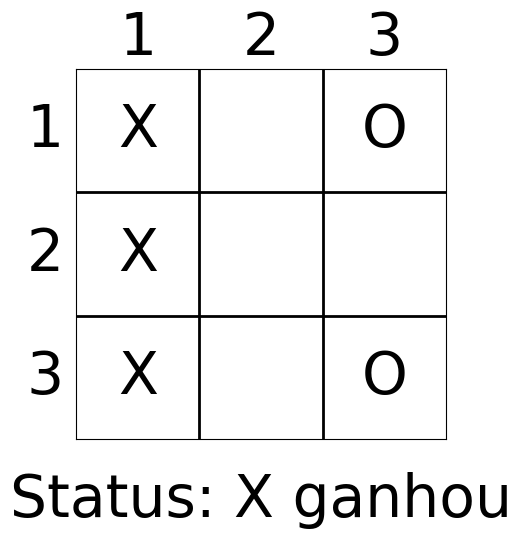

In [43]:
from IPython.display import clear_output

# Convertendo a lista de jogadas em um array 3x3
jogada = [0,0,0,0,0,0,0,0,0]
plot_board(jogada)

finalizar_jogo = False

while not finalizar_jogo:
    clear_output(wait=True)
    # Coletando a jogada
    linha,coluna = coleta_jogada()
    
    # Chamando a função de validação de jogada
    if valida_jogada(jogada,linha,coluna):
        # Realizando o ajuste da jogada a partir das posições de inserção informadas
        jogada = ajuste_jogada(jogada,linha,coluna)
        print('Jogada realizada!')
    else:
        print("Jogada não realizada")
        continue # Recomeça solicitando a jogada para o usuário
    
    # Redefinindo o shape do array 2d para usar no classificador
    jogada = jogada.reshape(9,).reshape(1,-1)

    # Obtenção do status do jogo após jogada do usuário
    predicao = gb.predict(jogada)
    
    # Caso haja um vencedor o loop será encerrado
    if str(predicao) != "[2]":
        finalizar_jogo = True
        plot_board(jogada,predicao)
        break
    
    jogada = jogada.reshape(3,3)

    # Realização de jogada da máquina
    jogada = jogada_COM(jogada)

    # Redefinindo o shape do array para usar no classificador
    jogada = jogada.reshape(9,).reshape(1,-1)

    # Obtenção do status do jogo após jogada da máquina
    predicao = gb.predict(jogada)

    # Plotando o tabuleiro 
    plot_board(jogada,predicao)
    
    # Caso haja um vencedor o loop será encerrado
    if str(predicao) != "[2]":
        finalizar_jogo = True